# Tensorflow Records- tf-records

```tf-records:```

- TFRecords is a tensorflow framework binary storage format which stores sequence of binary records.
- Sequency of binar records means we need to create a data structure(name,values) manually to store the data in binary format.
- TFRecords,Internally uses protocol buffer to serialize the structure data. Also helps to create a communication between two interface via wire or store the data.

***Advantages of using tf-records:***
- When we are working on large dataset, using binary file format for storage it may have significant impact in terms of performance on our data pipeline and required training time of your machine learning model.
- Huge data we can store in less memory space though it's a binary file format.
- Binary data takes less time to copy,read and load the data from the disk.
- Easy to combine multiple data sources to **.tfrecord.** 
- More optimized version of lighter xml.

***Dis-advantages of using tf-records:***
- You have to convert your data to this format in the first place and only limited documentation is available on how to do that.
- Since, It store's in sequence format we need to create data structure manually with name and values which is very pain task if you are dealing with large table columns.

## Structuring TFRecords
- A TFRecord file stores your data as a sequence of binary strings. This means you need to specify the structure of your data before you write it to the file.
- Tensorflow provides two ways to structure the the data

1) ***tf.train.Example***

2) ***tf.train.SequenceExample.***

# Use Case:1 - Movie recommendations using tf.train.Example

## 1) tf.train.Example
##### tf.train.Example isn’t a normal Python class, but it's a protocol buffer.

- tf.train.Example protocol buffer can be used to build sequence data structure with name as key and value and value. Similar to dictionary format like key,value pair

....Let's build Movie recommendations using tf.train.Example

## Movie recommendations using tf.train.Example

If your dataset consist of features, where each feature is a list of values of the same type, tf.train.Example is the right component to use.



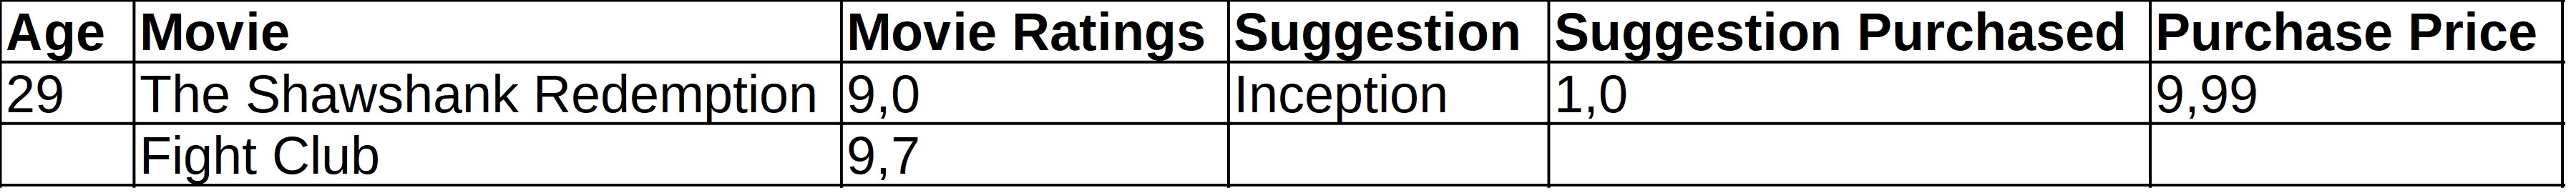

In [1]:
#----------------------------------------------
# coding: utf-8
# PoC on Tensorflow Records:tf-records
# Created Date : 24-01-2020
# Author : lokanath Baral
# Copyright : Copyright 2020,eMinds
#----------------------------------------------

In [54]:
# import required packages/library
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%precision 2

'%.2f'

In [55]:
# Print package versions
print('Python Version:{}'.format(sys.version))
print('Tensorflow Version:{}'.format(tf.__version__))
print('Numpy Version:{}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))
print('matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(sns.__version__))

Python Version:3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Tensorflow Version:1.14.0
Numpy Version:1.16.2
Pandas Version: 0.24.2
matplotlib Version: 3.0.3
Seaborn Version: 0.9.0


In [56]:
# Create movies data structure
data = {
    'Age': 29,
    'Movie': ['The Shawshank Redemption', 'Fight Club'],
    'Movie Ratings': [9.0, 9.7],
    'Suggestion': 'Inception',
    'Suggestion Purchased': 1.0,
    'Purchase Price': 9.99
}
print('movies data: \n {}:'.format(data))

movies data: 
 {'Age': 29, 'Movie': ['The Shawshank Redemption', 'Fight Club'], 'Movie Ratings': [9.0, 9.7], 'Suggestion': 'Inception', 'Suggestion Purchased': 1.0, 'Purchase Price': 9.99}:


In [57]:
# Create the Example
example = tf.train.Example(features=tf.train.Features(feature={
    'Age': tf.train.Feature(
        int64_list=tf.train.Int64List(value=[data['Age']])),
    'Movie': tf.train.Feature(
        bytes_list=tf.train.BytesList(
            value=[m.encode('utf-8') for m in data['Movie']])),
    'Movie Ratings': tf.train.Feature(
        float_list=tf.train.FloatList(value=data['Movie Ratings'])),
    'Suggestion': tf.train.Feature(
        bytes_list=tf.train.BytesList(
            value=[data['Suggestion'].encode('utf-8')])),
    'Suggestion Purchased': tf.train.Feature(
        float_list=tf.train.FloatList(
            value=[data['Suggestion Purchased']])),
    'Purchase Price': tf.train.Feature(
        float_list=tf.train.FloatList(value=[data['Purchase Price']]))
}))

print(example)

features {
  feature {
    key: "Age"
    value {
      int64_list {
        value: 29
      }
    }
  }
  feature {
    key: "Movie"
    value {
      bytes_list {
        value: "The Shawshank Redemption"
        value: "Fight Club"
      }
    }
  }
  feature {
    key: "Movie Ratings"
    value {
      float_list {
        value: 9.0
        value: 9.699999809265137
      }
    }
  }
  feature {
    key: "Purchase Price"
    value {
      float_list {
        value: 9.989999771118164
      }
    }
  }
  feature {
    key: "Suggestion"
    value {
      bytes_list {
        value: "Inception"
      }
    }
  }
  feature {
    key: "Suggestion Purchased"
    value {
      float_list {
        value: 1.0
      }
    }
  }
}



In [58]:
# Write TFrecord file
with tf.python_io.TFRecordWriter('customer_movies_rating.tfrecord') as writer:
    writer.write(example.SerializeToString())

In [59]:
# Read and print data:
sess = tf.InteractiveSession()

# Read TFRecord file
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(['customer_movies_rating.tfrecord'])

_, serialized_example = reader.read(filename_queue)

# Define features
read_features = {
    'Age': tf.FixedLenFeature([], dtype=tf.int64),
    'Movie': tf.VarLenFeature(dtype=tf.string),
    'Movie Ratings': tf.VarLenFeature(dtype=tf.float32),
    'Suggestion': tf.FixedLenFeature([], dtype=tf.string),
    'Suggestion Purchased': tf.FixedLenFeature([], dtype=tf.float32),
    'Purchase Price': tf.FixedLenFeature([], dtype=tf.float32)}

# Extract features from serialized data
read_data = tf.parse_single_example(serialized=serialized_example,
                                    features=read_features)

# Many tf.train functions use tf.train.QueueRunner,
# so we need to start it before we read
tf.train.start_queue_runners(sess)

# Print features
for name, tensor in read_data.items():
    print('{}: {}'.format(name, tensor.eval()))

Movie: SparseTensorValue(indices=array([[0],
       [1]], dtype=int64), values=array([b'The Shawshank Redemption', b'Fight Club'], dtype=object), dense_shape=array([2], dtype=int64))
Movie Ratings: SparseTensorValue(indices=array([[0],
       [1]], dtype=int64), values=array([9. , 9.7], dtype=float32), dense_shape=array([2], dtype=int64))
Age: 29
Purchase Price: 9.989999771118164
Suggestion: b'Inception'
Suggestion Purchased: 1.0


***Key tf-record API's:***

1. Read the TFRecord using a ***tf.TFRecordReader***.
2. Define the features using ***tf.FixedLenFeature*** and ***tf.VarLenFeature***, depending on what has been defined during the definition of tf.train.Example.
3. Parse ***tf.train.Example*** a time using ***tf.parse_single_example***.

# Use Case: 1.1 - Movie recommendations using tf.train.SequenceExample

- tf.train.SequenceExample is the right choice if you have features that consist of lists of identically typed data and maybe some contextual data.

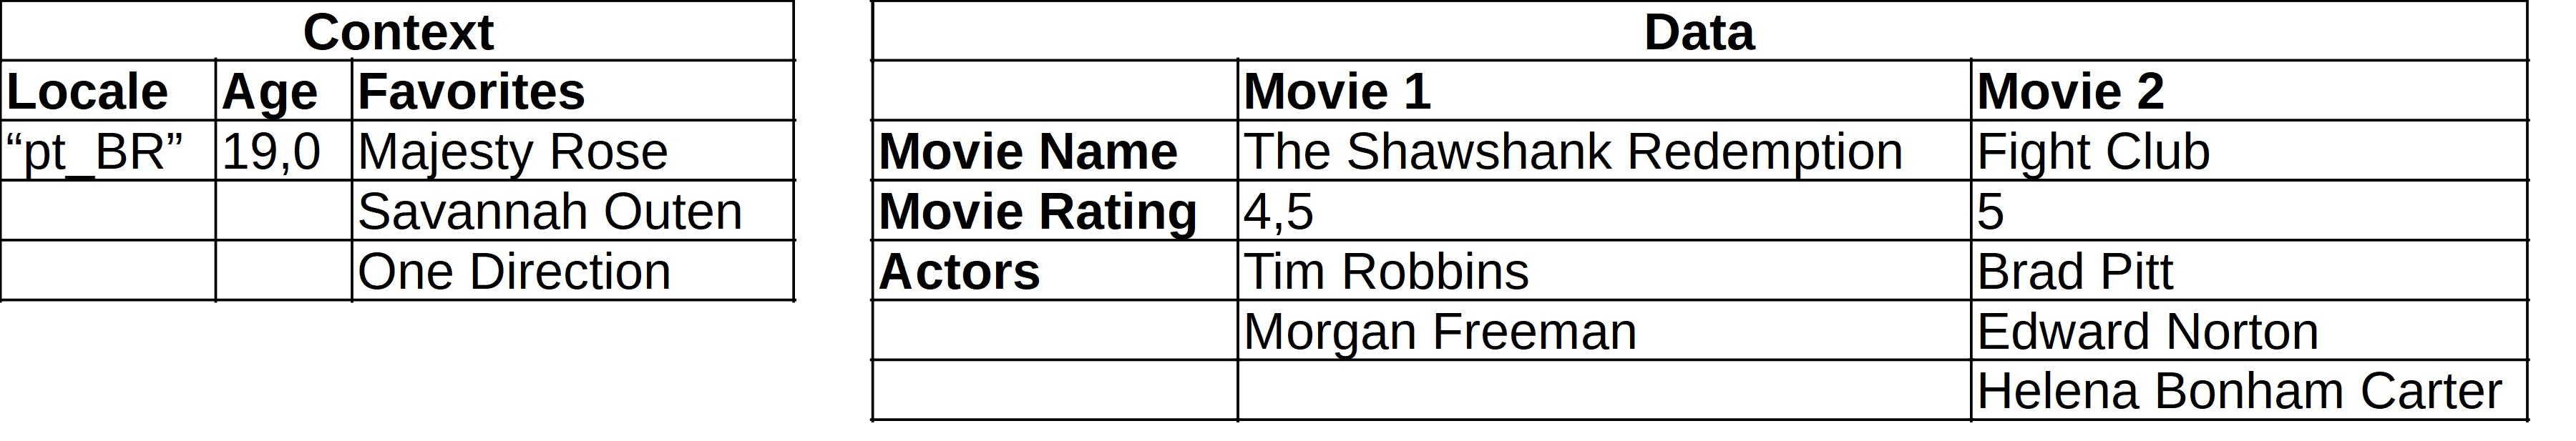

The data from table “Context” is stored in context as tf.train.Features, just like we did for tf.train.Example

We have a number of context features — 
- Locale
- Age
- Favorites

The data from table “Data” — Movie Name, Movie Rating, and Actors — are each stored in a separate tf.train.FeatureList each.

that are user specific and a list of movie recommendations of the user, which consist of 
1. Movie Name
1. Movie Rating
1. Actors.

In [60]:
# Create example data
data = {
    # Context
    'Locale': 'pt_BR',
    'Age': 19,
    'Favorites': ['Majesty Rose', 'Savannah Outen', 'One Direction'],
    # Data
    'Data': [
        {   # Movie 1
            'Movie Name': 'The Shawshank Redemption',
            'Movie Rating': 9.0,
            'Actors': ['Tim Robbins', 'Morgan Freeman']
        },
        {   # Movie 2
            'Movie Name': 'Fight Club',
            'Movie Rating': 9.7,
            'Actors': ['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']
        }
    ]
}

print(data)

{'Locale': 'pt_BR', 'Age': 19, 'Favorites': ['Majesty Rose', 'Savannah Outen', 'One Direction'], 'Data': [{'Movie Name': 'The Shawshank Redemption', 'Movie Rating': 9.0, 'Actors': ['Tim Robbins', 'Morgan Freeman']}, {'Movie Name': 'Fight Club', 'Movie Rating': 9.7, 'Actors': ['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']}]}


In [61]:
# Create the context features (short form)
customer = tf.train.Features(feature={
    'Locale': tf.train.Feature(bytes_list=tf.train.BytesList(
        value=[data['Locale'].encode('utf-8')])),
    'Age': tf.train.Feature(int64_list=tf.train.Int64List(
        value=[data['Age']])),
    'Favorites': tf.train.Feature(bytes_list=tf.train.BytesList(
        value=[m.encode('utf-8') for m in data['Favorites']]))
})

# Create sequence data
names_features = []
ratings_features = []
actors_features = []
for movie in data['Data']:
    # Create each of the features, then add it to the
    # corresponding feature list
    movie_name_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(
            value=[movie['Movie Name'].encode('utf-8')]))
    names_features.append(movie_name_feature)
    
    movie_rating_feature = tf.train.Feature(
        float_list=tf.train.FloatList(value=[movie['Movie Rating']]))
    ratings_features.append(movie_rating_feature)
                                             
    movie_actors_feature = tf.train.Feature(
        bytes_list=tf.train.BytesList(
            value=[m.encode('utf-8') for m in movie['Actors']]))
    actors_features.append(movie_actors_feature)

movie_names = tf.train.FeatureList(feature=names_features)
movie_ratings = tf.train.FeatureList(feature=ratings_features)
movie_actors = tf.train.FeatureList(feature=actors_features)

movies = tf.train.FeatureLists(feature_list={
    'Movie Names': movie_names,
    'Movie Ratings': movie_ratings,
    'Movie Actors': movie_actors
})

# Create the SequenceExample
example = tf.train.SequenceExample(context=customer,
                                   feature_lists=movies)

print(example)

context {
  feature {
    key: "Age"
    value {
      int64_list {
        value: 19
      }
    }
  }
  feature {
    key: "Favorites"
    value {
      bytes_list {
        value: "Majesty Rose"
        value: "Savannah Outen"
        value: "One Direction"
      }
    }
  }
  feature {
    key: "Locale"
    value {
      bytes_list {
        value: "pt_BR"
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "Movie Actors"
    value {
      feature {
        bytes_list {
          value: "Tim Robbins"
          value: "Morgan Freeman"
        }
      }
      feature {
        bytes_list {
          value: "Brad Pitt"
          value: "Edward Norton"
          value: "Helena Bonham Carter"
        }
      }
    }
  }
  feature_list {
    key: "Movie Names"
    value {
      feature {
        bytes_list {
          value: "The Shawshank Redemption"
        }
      }
      feature {
        bytes_list {
          value: "Fight Club"
        }
      }
    }
  }
  feature_list 

In [62]:
# Write TFrecord file
with tf.python_io.TFRecordWriter('customer_movie.tfrecord') as writer:
    writer.write(example.SerializeToString())

In [63]:
# Read and print data:
sess = tf.InteractiveSession()

# Read TFRecord file
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(['customer_movie.tfrecord'])

_, serialized_example = reader.read(filename_queue)

# Define features
context_features = {
    'Locale': tf.FixedLenFeature([], dtype=tf.string),
    'Age': tf.FixedLenFeature([], dtype=tf.int64),
    'Favorites': tf.VarLenFeature(dtype=tf.string)
}
sequence_features = {
    'Movie Names': tf.FixedLenSequenceFeature([], dtype=tf.string),
    'Movie Ratings': tf.FixedLenSequenceFeature([], dtype=tf.float32),
    'Movie Actors': tf.VarLenFeature(dtype=tf.string)
}

# Extract features from serialized data
context_data, sequence_data = tf.parse_single_sequence_example(
    serialized=serialized_example,
    context_features=context_features,
    sequence_features=sequence_features)

# Many tf.train functions use tf.train.QueueRunner,
# so we need to start it before we read
tf.train.start_queue_runners(sess)

# Print features
print('Context:')
for name, tensor in context_data.items():
    print('{}: {}'.format(name, tensor.eval()))

print('\nData')
for name, tensor in sequence_data.items():
    print('{}: {}'.format(name, tensor.eval()))

Context:
Favorites: SparseTensorValue(indices=array([[0],
       [1],
       [2]], dtype=int64), values=array([b'Majesty Rose', b'Savannah Outen', b'One Direction'], dtype=object), dense_shape=array([3], dtype=int64))
Age: 19
Locale: b'pt_BR'

Data
Movie Actors: SparseTensorValue(indices=array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 2]], dtype=int64), values=array([b'Tim Robbins', b'Morgan Freeman', b'Brad Pitt', b'Edward Norton',
       b'Helena Bonham Carter'], dtype=object), dense_shape=array([2, 3], dtype=int64))
Movie Names: [b'The Shawshank Redemption' b'Fight Club']
Movie Ratings: [9.  9.7]


Reading TFRecords based on tf.train.SequenceExample works the same as for tf.train.Examples. The only difference is that instead of just a single set of features, we need to define two: context and sequence features. Context features work exactly the same as shown before. Sequence features must be of type tf.VarLenFeature or tf.FixedLenSequenceFeature and are parsed using tf.parse_single_sequence_example.

## Conclusion

Using Tensorflow TFRecords is a convenient way to get your data into your machine learning pipeline, but understanding all the bits and pieces can be daunting at the beginning. 